# Assignment 6 - Albedo Feedback
## Trevor Durning
## 10/29/2024

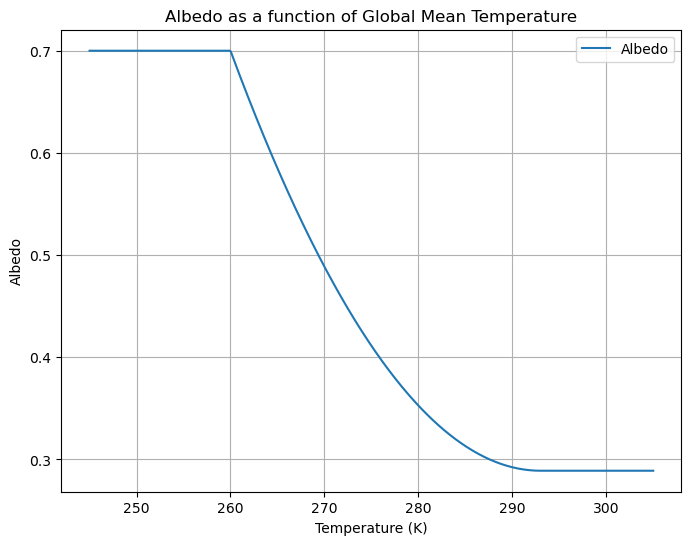

In [9]:
# 1. Part A
import numpy as np
import matplotlib.pyplot as plt

# Define parameters for the albedo function
alpha_0 = 0.289  # Albedo of a warm, ice-free planet
alpha_i = 0.7  # Albedo of a cold, ice-covered planet
T_0 = 293  # Temperature above which the planet is ice-free (K)
T_i = 260  # Temperature below which the planet is ice-covered (K)

# Define the albedo function based on the temperature
def albedo(T):
    if T <= T_i:
        return alpha_i
    elif T_i < T < T_0:
        return alpha_0 + (alpha_i - alpha_0) * ((T - T_0) ** 2 / (T_i - T_0) ** 2)
    else:
        return alpha_0

# Generate a matrix of temperatures
temperatures = np.linspace(245, 305, 500)
albedos = np.array([albedo(T) for T in temperatures])

# Plot albedo as a function of temperature
plt.figure(figsize=(8, 6))
plt.plot(temperatures, albedos, label='Albedo')
plt.xlabel('Temperature (K)')
plt.ylabel('Albedo')
plt.title('Albedo as a function of Global Mean Temperature')
plt.grid(True)
plt.legend()
plt.show()

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
solarconstant = 1366  # W/m^2
stefanboltzman = 5.67e-8  # W/m^2/K^4
heatcapacity = 4.0e8  # J/m^2/K
epsilon = 0.80

T_s_initial = ((solarconstant * (1 - albedo(288.3)) / 4) / (stefanboltzman * (1 - epsilon / 2))) ** (1 / 4)
T_a_initial = (epsilon * stefanboltzman * T_s_initial**4 / (2 * stefanboltzman)) ** (1 / 4)
u0 = np.array([T_a_initial, T_s_initial])

# Time setup
dT = 60 * 60 * 24 * 365  # time step in seconds (1 year)
t0 = 0
Tmax = 100 * dT
t = np.arange(t0, Tmax, dT)

# Differential equations function
def myfun(t, u):
    current_albedo = albedo(u[1])  # u[1]
    M = 2
    f = np.zeros(M)
    f[0] = (solarconstant * (1 - current_albedo) / 4 - epsilon * stefanboltzman * (u[0] ** 4)
            - (1 - epsilon) * stefanboltzman * (u[1] ** 4)) / heatcapacity
    f[1] = (solarconstant * (1 - current_albedo) / 4 + epsilon * stefanboltzman * (u[0] ** 4)
            - stefanboltzman * (u[1] ** 4)) / heatcapacity
    return f

# Solving the differential equations
sol = solve_ivp(myfun, [t0, Tmax], u0, method='RK45', t_eval=t)

# Get the final surface temperature in Kelvin and Celsius
T_s = sol.y[1][-1]  # the last value of Ts from the solution

# Print the equilibrium temperature
print("Equilibrium Surface Temperature is %0.4f Kelvin or %0.4f deg C" % (T_s, T_s - 273.15))
print("Total warming is now %0.4f Kelvin" % (T_s - 288.3))

Equilibrium Surface Temperature is 290.4370 Kelvin or 17.2870 deg C
Total warming is now 2.1370 Kelvin
